In [1]:
import time

In [2]:
def getFile(filename):
    f = open(filename, 'r')    
    line = f.readline()
    arrays = []
    while line:
        arrays.append([int(i) for i in line[1:-2].split(',')])  #CONVERT A STRING TO INTEGER
        line = f.readline()   #READ ELEMENT LINE BY LINE
    f.close()
    return arrays

In [3]:
def saveFile(filename, arrays):
    file1 = open(filename,"w") 
    for arr in arrays:
        line = str(arr)+'\n'
        file1.writelines(line) 
    file1.close() #to change file access modes

In [4]:
import random

def generate_array(length):
    generated_array = []
    for i in range(0,length):
        generated_array.append(random.randint(0,length))
    return generated_array

In [5]:
#creating a array of size 5,10 15..... 1000
length_array = []
i=0
input_size = int(input("enter the size of a array: "))
while i<=input_size:
# while i<=1000:
    i+=5
    length_array.append(i)
#     print(length_array)
    

random_arrays = []
asc_arrays = []
des_arrays = []

for i in length_array:
    random_arrays.append(generate_array(i))   #STORE RANDOM NUMBER
    asc_arrays.append(sorted(generate_array(i)))    #STORE NUMBER IN ASCENDING ORDER
    des_arrays.append(sorted(generate_array(i), reverse=True))        #STORE NUMBER IN DESCENDING ORDER
    
saveFile('ascending_file.txt', asc_arrays)
saveFile('descending_file.txt', des_arrays)
saveFile('rand_file.txt', random_arrays)

enter the size of a array: 5


In [6]:
def heapify(genearted_list,i,genearted_list_length):
    left = 2*i+1               #calulating position of child
    right = (2*i)+2            #index start at 0
    max = i
    
    #checking if index of child less than the total index
    #checking if the child less than parent
    if(left< genearted_list_length) and (genearted_list[left]>genearted_list[i]):
        max = left
    else:
        max = i
        
    if(right<genearted_list_length) and (genearted_list[right]>genearted_list[max]):
        max = right
        
    if(max != i):           #swap largest child with parent
        genearted_list[i],genearted_list[max] = genearted_list[max],genearted_list[i] 
        
        genearted_list = heapify(genearted_list,genearted_list_length,max)
    return genearted_list

In [7]:
def buildheap(genearted_list):   #function to build max heap 
    genearted_list_length = len(genearted_list)
    
    for i in range(genearted_list_length,-1,-1):
        genearted_list = heapify(genearted_list,i,genearted_list_length)
    return genearted_list

In [8]:
def heap_sort(genearted_list):
    genearted_list_length = len(genearted_list)
    buildheap(genearted_list)    #fun call to build max heap
    
    #deleting from the root node as that will be the largest
    for i in range(genearted_list_length-1,0,-1):
        genearted_list[i],genearted_list[0] = genearted_list[0],genearted_list[i] #removing the last element and storing the largest number here
        heapify(genearted_list,i, 0) 
        
    return(genearted_list)

In [9]:
if __name__ =='__main__' :
    heap_des_lists = getFile('descending_file.txt')
    heap_asc_lists = getFile('ascending_file.txt')
    heap_random_lists = getFile('rand_file.txt')
                         
    total_asc_heap_time = []
    total_des_heap_time = []
    total_ran_heap_time = []
    
    sorted_des_heap_list = []
    sorted_asc_heap_list = []
    sorted_ran_heap_list = []
    

    
    for genearted_list in heap_des_lists:
        
        heap_desc_start_time = time.time()
        sorted_des_heap_list.append(heap_sort(genearted_list))
        heap_desc_end_time = time.time()
        
        heap_des_run_time = heap_desc_end_time-heap_desc_start_time
        
        total_des_heap_time.append(heap_des_run_time)
        
    for genearted_list in heap_asc_lists:
        
        heap_asc_start_time = time.time()
        sorted_asc_heap_list.append(heap_sort(genearted_list))
        heap_asc_end_time = time.time()
        
        heap_asc_run_time = heap_asc_end_time-heap_asc_start_time
        
        total_asc_heap_time.append(heap_asc_run_time)
        
        
    for genearted_list in heap_random_lists:
        
        heap_ran_start_time = time.time()
        sorted_ran_heap_list.append(heap_sort(genearted_list))
        heap_ran_end_time = time.time()
        
        heap_ran_run_time = heap_ran_end_time-heap_ran_start_time
        
        total_ran_heap_time.append(heap_ran_run_time)
        
        
    print("creating a heap_sort file which sorted the descending order number: \n")    
    saveFile('insert_descending_file.txt',sorted_des_heap_list)
    print("creating a heap_sort file which sorted the ascending order number: \n") 
    saveFile('insert_ascending_file.txt',sorted_asc_heap_list)
    print("creating a heap_sort file which sorted the random number: \n") 
    saveFile('insert_random_file.txt',sorted_ran_heap_list)
    

creating a heap_sort file which sorted the descending order number: 

creating a heap_sort file which sorted the ascending order number: 

creating a heap_sort file which sorted the random number: 



In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

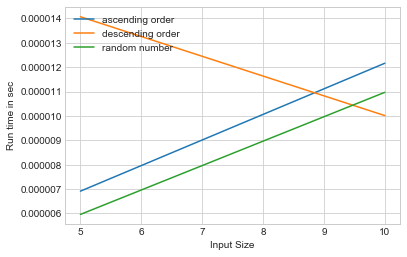

<Figure size 432x288 with 0 Axes>

In [11]:
plt.xlabel('Input Size')
plt.ylabel('Run time in sec')
fig = plt.gcf()
plt.plot(length_array,total_asc_heap_time);
plt.plot(length_array,total_des_heap_time)
plt.plot(length_array,total_ran_heap_time)
plt.legend(['ascending order','descending order','random number'], loc='upper left')
plt.show()
plt.draw()
fig.savefig('bubbleSort_runtime.png',dpi = 200)